# Rt Live Model

In [1]:
%load_ext autoreload
%autoreload 2

import pymc3 as pm
import pandas as pd
import numpy as np
import arviz as az
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
from matplotlib import pyplot as plt
from covid.models.generative import GenerativeModel
from covid.data import summarize_inference_data
%config InlineBackend.figure_format = 'retina'

from covid.data import get_and_process_covidtracking_data_il, get_and_process_covidtracking_data_ilsev, summarize_inference_data

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'
Matplotlib created a temporary config/cache directory at /tmp/matplotlib-gh9ltal6 because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


## Fetch data and select the state's data

In [2]:
df = get_and_process_covidtracking_data_il(run_date=pd.Timestamp.today())#-pd.Timedelta(days=1))
dfunn = get_and_process_covidtracking_data_il(run_date=pd.Timestamp.today(), norm=False)#-pd.Timedelta(days=1))
dfsev = get_and_process_covidtracking_data_ilsev(run_date=pd.Timestamp.today()-pd.Timedelta(days=1))

In [3]:
region = "Israel"
model_data = df.loc[region]
model_sev = dfsev.loc[region]
model_unn = dfunn.loc[region]

## Create the model instance and sample

In [4]:
gmsev = GenerativeModel(region, model_sev, buffer_days = 20, delay=2+5, sigma=0.07)
gmsev.sample()

Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, seed, log_r_t]


Sampling 4 chains for 700 tune and 200 draw iterations (2_800 + 800 draws total) took 5984 seconds.


In [5]:
gm = GenerativeModel(region, model_data, delay=2, sigma=0.07)
gm.sample()

Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, seed, log_r_t]


Sampling 4 chains for 700 tune and 200 draw iterations (2_800 + 800 draws total) took 5769 seconds.


In [6]:
gmunn = GenerativeModel(region, model_unn, delay=2, sigma=0.07)
gmunn.sample()

Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, seed, log_r_t]


Sampling 4 chains for 700 tune and 200 draw iterations (2_800 + 800 draws total) took 5149 seconds.


## Summarize Model Output

In [7]:
result = summarize_inference_data(gm.inference_data)
resultsev = summarize_inference_data(gmsev.inference_data)
resultunn = summarize_inference_data(gmunn.inference_data)

In [8]:
result.tail(60)

,mean,median,lower_80,upper_80,infections,test_adjusted_positive,test_adjusted_positive_raw,positive,tests
date,,,,,,,,,
2020-09-09,1.156467,1.156839,0.996334,1.272368,2859.524293,2443.497277,2339.411516,3996,45110
2020-09-10,1.153976,1.148626,1.009327,1.286102,2937.733139,2487.506266,2319.249460,4161,47381
2020-09-11,1.149552,1.141572,1.000820,1.283406,3021.434137,2533.706904,2453.404270,3975,42788
2020-09-12,1.140087,1.131095,1.004785,1.272790,3107.458853,2582.777097,2410.905320,2719,29784
2020-09-13,1.127120,1.121037,0.986556,1.250889,3193.446576,2635.382027,2475.173099,3175,33876
2020-09-14,1.101912,1.099560,0.979181,1.238895,3277.382101,2692.028297,2741.796672,4805,46282
2020-09-15,1.068474,1.067750,0.920865,1.182340,3356.404730,2752.880964,2597.903093,5539,56307
2020-09-16,1.033237,1.027213,0.906859,1.158263,3424.736499,2817.748797,2280.964656,4574,52958
2020-09-17,0.994438,0.989091,0.858428,1.108506,3475.201017,2886.130996,2474.907323,5385,57462


In [9]:
resultunn.tail(60)

,mean,median,lower_80,upper_80,infections,test_adjusted_positive,test_adjusted_positive_raw,positive,tests
date,,,,,,,,,
2020-09-09,1.175941,1.170972,1.042099,1.316196,5254.304690,3417.102739,3996.0,3996,100000
2020-09-10,1.142138,1.137058,1.005247,1.283687,5460.288703,3615.322134,4161.0,4161,100000
2020-09-11,1.112622,1.106300,0.972127,1.235722,5645.230645,3819.614319,3975.0,3975,100000
2020-09-12,1.081429,1.078208,0.953761,1.213055,5802.930131,4028.223352,2719.0,2719,100000
2020-09-13,1.044589,1.034559,0.893286,1.153781,5931.690246,4239.046587,3175.0,3175,100000
2020-09-14,1.006867,0.999503,0.868892,1.118355,6029.845641,4449.411340,4805.0,4805,100000
2020-09-15,0.965984,0.959454,0.837513,1.078177,6091.359306,4656.061838,5539.0,5539,100000
2020-09-16,0.925681,0.916843,0.807932,1.048080,6110.597113,4855.532791,4574.0,4574,100000
2020-09-17,0.883407,0.881401,0.760002,0.987574,6083.451277,5044.382484,5385.0,5385,100000


In [19]:
resultsev.tail(60)

,mean,median,lower_80,upper_80,infections,test_adjusted_positive,test_adjusted_positive_raw,positive,tests
date,,,,,,,,,
2020-09-08,1.166193,1.166023,1.009243,1.281084,96.679070,58.867754,60.0,60.0,10000
2020-09-09,1.144845,1.148008,0.999575,1.268078,100.058766,60.928863,78.0,78.0,10000
2020-09-10,1.125033,1.115402,0.984832,1.250864,103.217508,63.154788,68.0,68.0,10000
2020-09-11,1.099084,1.093179,0.971280,1.237220,106.093810,65.544814,45.0,45.0,10000
2020-09-12,1.071811,1.068373,0.926173,1.180541,108.647035,68.098287,61.0,61.0,10000
2020-09-13,1.041377,1.037503,0.892291,1.132283,110.794469,70.809660,65.0,65.0,10000
2020-09-14,1.012148,1.005968,0.897371,1.130482,112.434857,73.668027,75.0,75.0,10000
2020-09-15,0.982326,0.978273,0.851789,1.090836,113.486324,76.658347,62.0,62.0,10000
2020-09-16,0.953001,0.947644,0.821550,1.049188,113.905357,79.760201,88.0,88.0,10000


## Plot Model Output

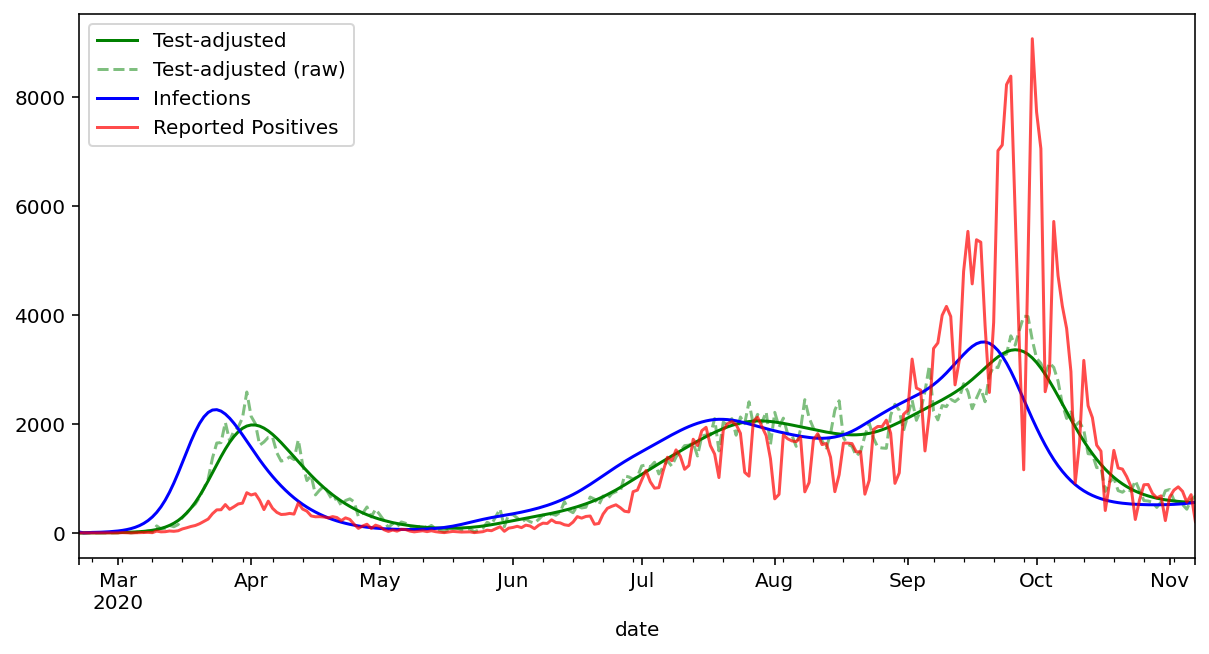

In [11]:
fig, ax = plt.subplots(figsize=(10,5))
result.test_adjusted_positive.plot(c="g", label="Test-adjusted")
result.test_adjusted_positive_raw.plot(c="g", alpha=.5, label="Test-adjusted (raw)", style="--")
result.infections.plot(c="b", label="Infections")
gm.observed.positive.plot(c='r', alpha=.7, label="Reported Positives")
fig.set_facecolor('w')
ax.legend();

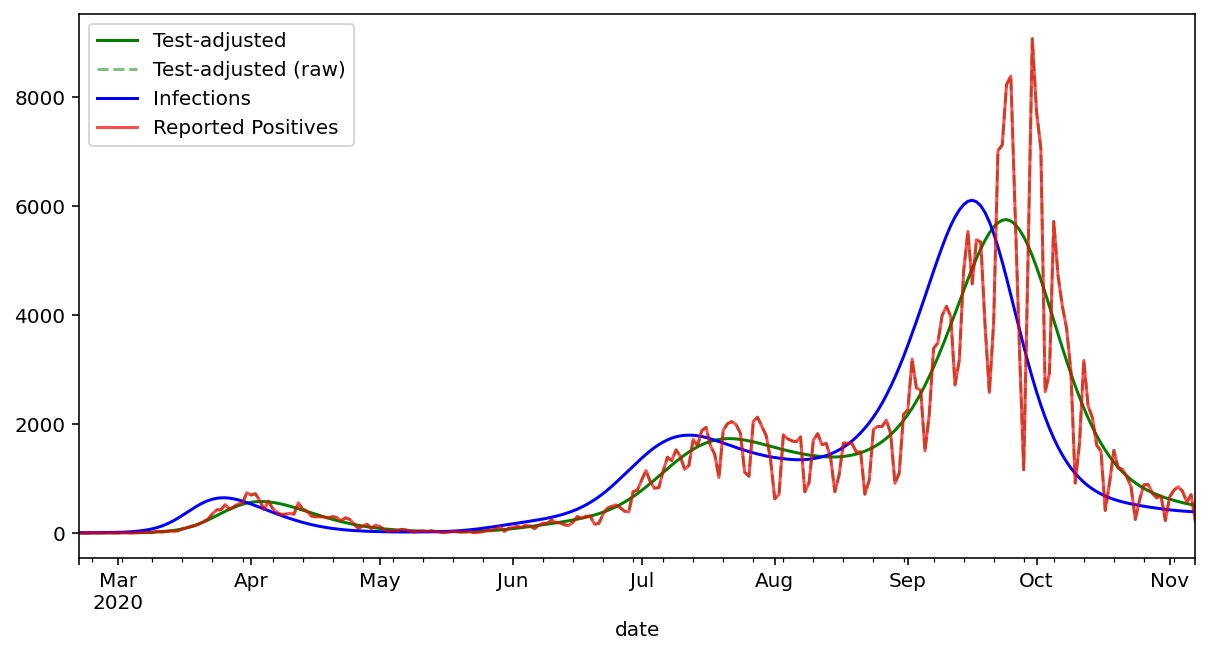

In [12]:
fig, ax = plt.subplots(figsize=(10,5))
resultunn.test_adjusted_positive.plot(c="g", label="Test-adjusted")
resultunn.test_adjusted_positive_raw.plot(c="g", alpha=.5, label="Test-adjusted (raw)", style="--")
resultunn.infections.plot(c="b", label="Infections")
gmunn.observed.positive.plot(c='r', alpha=.7, label="Reported Positives")
fig.set_facecolor('w')
ax.legend();

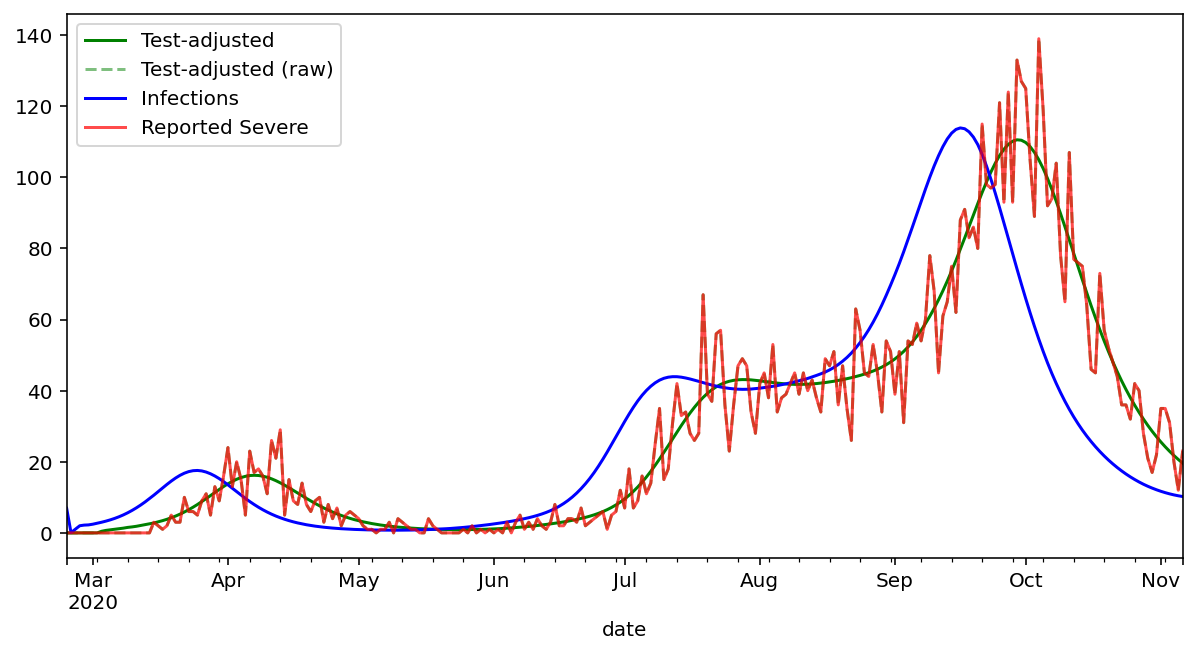

In [13]:
fig, ax = plt.subplots(figsize=(10,5))
resultsev.test_adjusted_positive.plot(c="g", label="Test-adjusted")
resultsev.test_adjusted_positive_raw.plot(c="g", alpha=.5, label="Test-adjusted (raw)", style="--")
resultsev.infections.plot(c="b", label="Infections")
gmsev.observed.positive.plot(c='r', alpha=.7, label="Reported Severe")
fig.set_facecolor('w')
ax.legend();

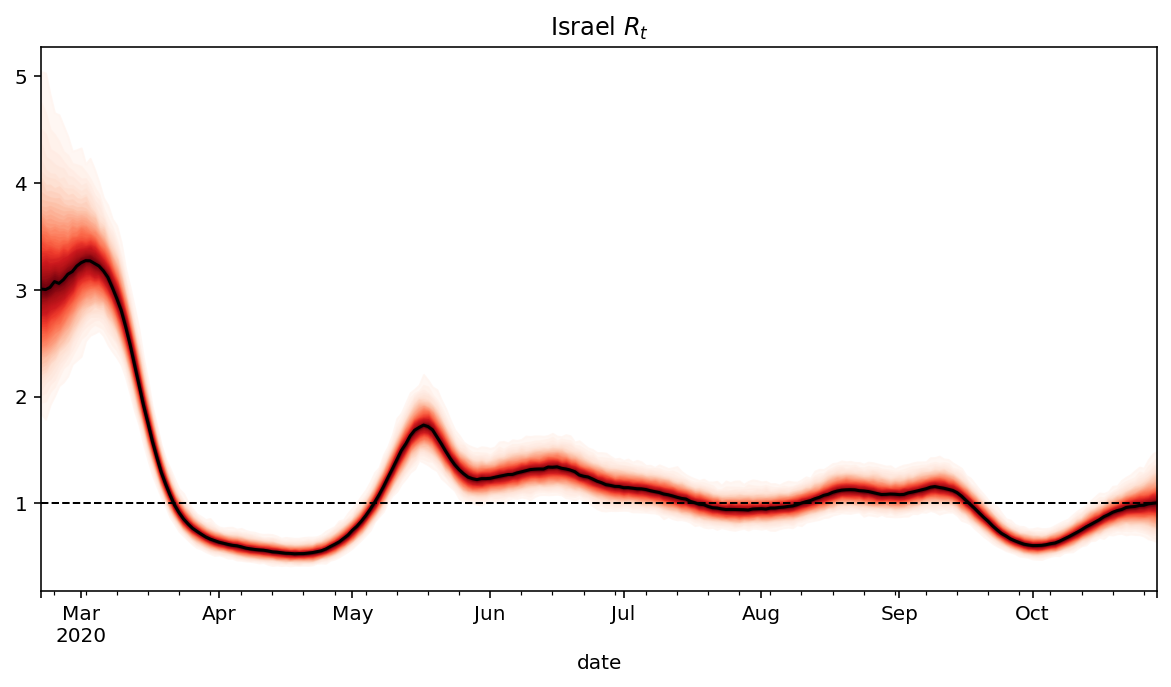

In [14]:
#plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(10,5))

ax.set_title(f"{region} $R_t$")
samples = gm.trace['r_t']
x=result.index
cmap = plt.get_cmap("Reds")
percs = np.linspace(51, 99, 40)
colors = (percs - np.min(percs)) / (np.max(percs) - np.min(percs))
samples = samples.T

result["median"].plot(c="k", ls='-')

for i, p in enumerate(percs[::-1]):
    upper = np.percentile(samples, p, axis=1)
    lower = np.percentile(samples, 100-p, axis=1)
    color_val = colors[i]
    ax.fill_between(x, upper, lower, color=cmap(color_val), alpha=.8)

ax.axhline(1.0, c="k", lw=1, linestyle="--")
ax.set_xlim(right=pd.Timestamp.today()-pd.Timedelta(days=10))
#ax.set_xlim(left = pd.Timestamp.today()-pd.Timedelta(days=70), right=pd.Timestamp.today()-pd.Timedelta(days=10))
#ax.set_ylim(top = 2)
fig.set_facecolor('w')

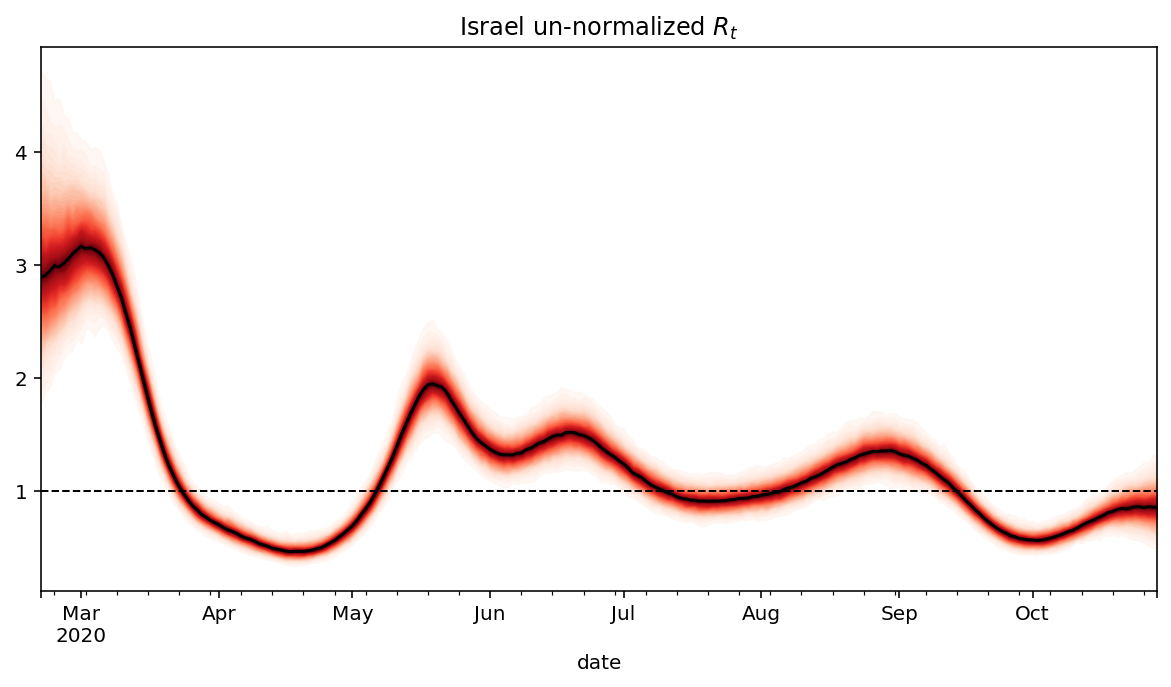

In [15]:
fig, ax = plt.subplots(figsize=(10,5))

ax.set_title(f"{region} un-normalized $R_t$")
samples = gmunn.trace['r_t']
x=result.index
cmap = plt.get_cmap("Reds")
percs = np.linspace(51, 99, 40)
colors = (percs - np.min(percs)) / (np.max(percs) - np.min(percs))
samples = samples.T

resultunn["median"].plot(c="k", ls='-')

for i, p in enumerate(percs[::-1]):
    upper = np.percentile(samples, p, axis=1)
    lower = np.percentile(samples, 100-p, axis=1)
    color_val = colors[i]
    ax.fill_between(x, upper, lower, color=cmap(color_val), alpha=.8)

ax.axhline(1.0, c="k", lw=1, linestyle="--")
ax.set_xlim(right=pd.Timestamp.today()-pd.Timedelta(days=10))
#ax.set_xlim(left = pd.Timestamp.today()-pd.Timedelta(days=70), right=pd.Timestamp.today()-pd.Timedelta(days=10))
#ax.set_ylim(top = 2)
fig.set_facecolor('w')

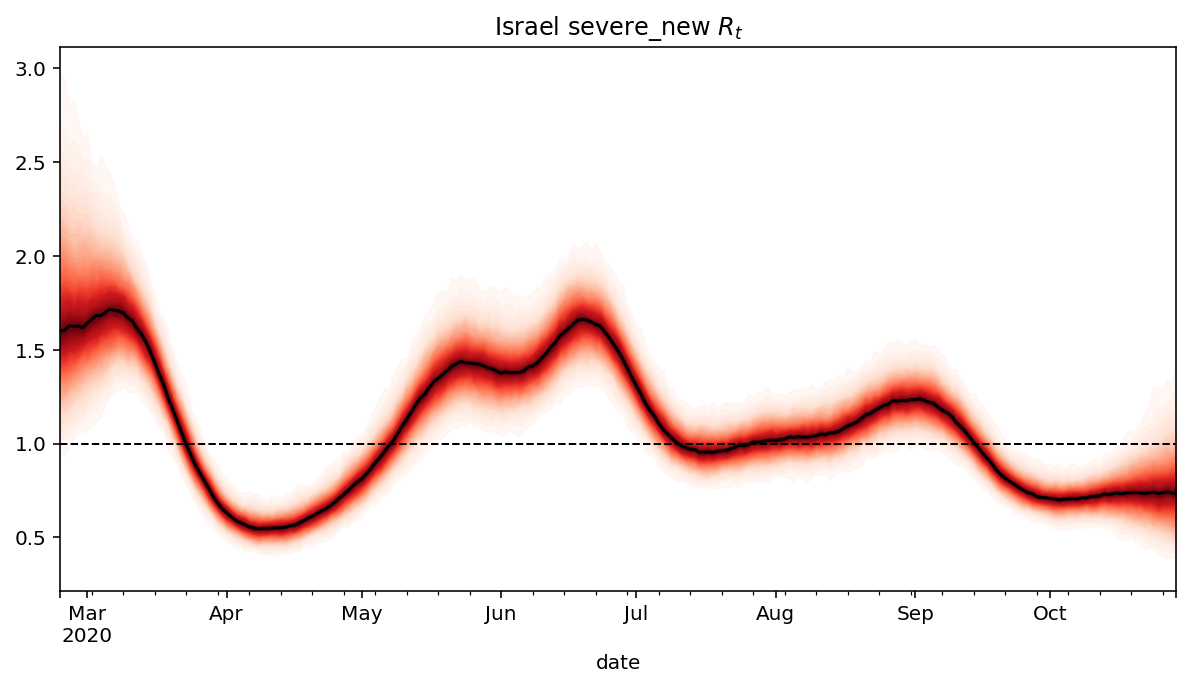

In [16]:
fig, ax = plt.subplots(figsize=(10,5))

ax.set_title(f"{region} severe_new $R_t$")
samples = gmsev.trace['r_t']
x=resultsev.index
cmap = plt.get_cmap("Reds")
percs = np.linspace(51, 99, 40)
colors = (percs - np.min(percs)) / (np.max(percs) - np.min(percs))
samples = samples.T

resultsev["median"].plot(c="k", ls='-')

for i, p in enumerate(percs[::-1]):
    upper = np.percentile(samples, p, axis=1)
    lower = np.percentile(samples, 100-p, axis=1)
    color_val = colors[i]
    ax.fill_between(x, upper, lower, color=cmap(color_val), alpha=.8)

ax.axhline(1.0, c="k", lw=1, linestyle="--")
ax.set_xlim(right=pd.Timestamp.today()-pd.Timedelta(days=10))
fig.set_facecolor('w')

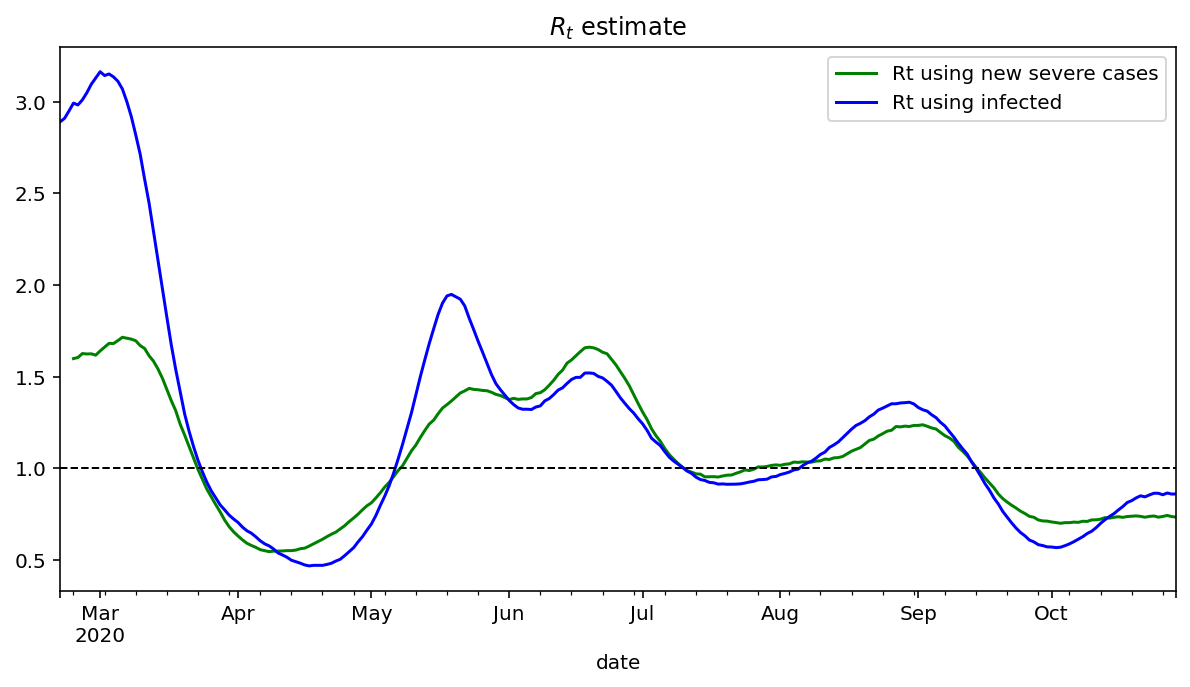

In [17]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title(f"$R_t$ estimate")
resultsev["median"].plot(c="g", ls='-', label="Rt using new severe cases")
resultunn["median"].plot(c="b", ls='-', label="Rt using infected")
ax.axhline(1.0, c="k", lw=1, linestyle="--")
ax.set_xlim(right=pd.Timestamp.today()-pd.Timedelta(days=10))
ax.legend()

In [18]:
resultunn.to_csv("results_unnormalized_out.csv")